In [6]:
import pandas as pd
import numpy as np
import pandas_datareader as data

In [51]:
data = pd.read_csv('./Bicycle.csv', index_col= 'Date', parse_dates= ['Date'])

In [52]:
data

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0
...,...,...,...
2020-12-31 19:00:00,27.0,11.0,16.0
2020-12-31 20:00:00,18.0,9.0,9.0
2020-12-31 21:00:00,18.0,9.0,9.0


In [53]:
data.columns = ['Total', 'East', 'West']

In [54]:
data.dropna().describe()

,Total,East,West
count,138521.000000,138521.000000,138521.000000
mean,112.147025,51.104800,61.042225
std,142.887838,65.881672,88.902702
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


<AxesSubplot:xlabel='Date'>

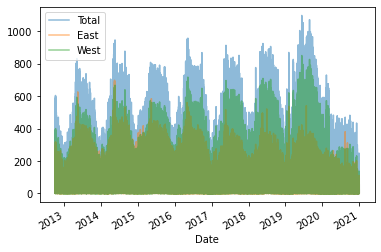

In [56]:
data.plot(alpha= 0.5)

### It doens't nake any sense, so we will try to get the data by `week`...

<AxesSubplot:xlabel='Date'>

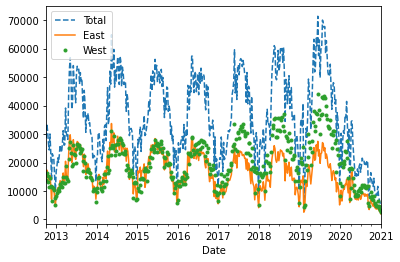

In [71]:
data.resample('W').sum().plot(style= ['--','-','.'])

In [82]:
Data_by_day = data.resample('D').sum()
Data_by_day

,Total,East,West
Date,,,
2012-10-03,7042.0,3520.0,3522.0
2012-10-04,6950.0,3416.0,3534.0
2012-10-05,6296.0,3116.0,3180.0
2012-10-06,4012.0,2160.0,1852.0
2012-10-07,4284.0,2382.0,1902.0
...,...,...,...
2020-12-27,876.0,398.0,478.0
2020-12-28,1758.0,761.0,997.0
2020-12-29,1042.0,448.0,594.0


In [85]:
by_Day_roller = Data_by_day.rolling(30, center= True).sum()
by_Day_roller

,Total,East,West
Date,,,
2012-10-03,NaN,NaN,NaN
2012-10-04,NaN,NaN,NaN
2012-10-05,NaN,NaN,NaN
2012-10-06,NaN,NaN,NaN
2012-10-07,NaN,NaN,NaN
...,...,...,...
2020-12-27,NaN,NaN,NaN
2020-12-28,NaN,NaN,NaN
2020-12-29,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

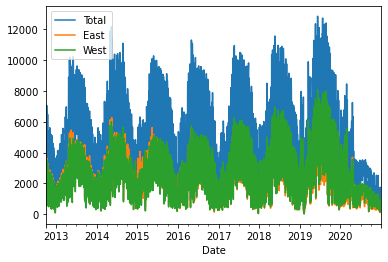

In [86]:
Data_by_day.plot()

<AxesSubplot:xlabel='Date'>

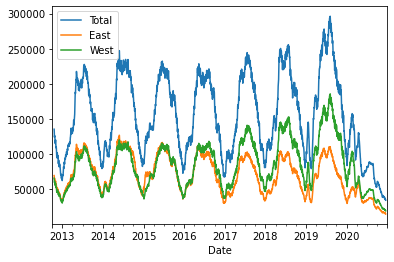

In [87]:
by_Day_roller.plot()

### Removing the Jaggedness...

<AxesSubplot:xlabel='Date'>

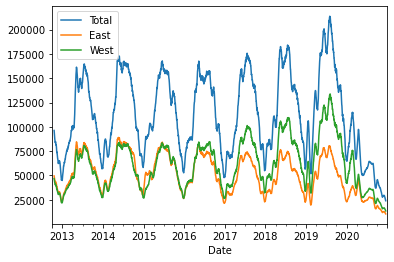

In [106]:
Data_by_day.rolling(30, center= True, win_type= 'gaussian').sum(std= 10).plot()

### Somewhat smooth right?

Now I want to see the `mean` of the users `by time`... simple...

In [109]:
data.groupby(data.index.time)

### Wo, wo!!

In [111]:
by_time = data.groupby(data.index.time).mean()
by_time

,Total,East,West
00:00:00,11.158323,4.722328,6.435995
01:00:00,5.909579,2.645072,3.264507
02:00:00,3.886806,1.864410,2.022396
03:00:00,2.868699,1.475489,1.393210
04:00:00,6.432531,3.402044,3.030487
05:00:00,25.371038,15.433050,9.937987
06:00:00,88.826260,53.223281,35.602979
07:00:00,223.871990,138.554997,85.316993
08:00:00,317.356314,186.443444,130.912870
09:00:00,186.273956,100.701785,85.572171


<AxesSubplot:xlabel='time'>

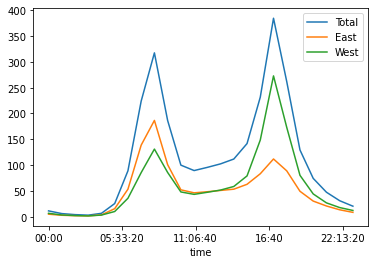

In [112]:
by_time.plot()

#### Showing the `x lables` in some `Round` forms... 

In [153]:
x_ticks_rounded = np.arange(8) * 3 * 60 * 60

In [154]:
x_ticks_rounded

array([    0, 10800, 21600, 32400, 43200, 54000, 64800, 75600])

<AxesSubplot:xlabel='time'>

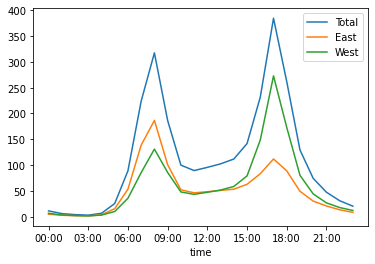

In [155]:
by_time.plot(xticks= x_ticks_rounded)

In [159]:
kaka = data.groupby(data.index.dayofweek).mean()

In [162]:
kaka.index= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

<AxesSubplot:>

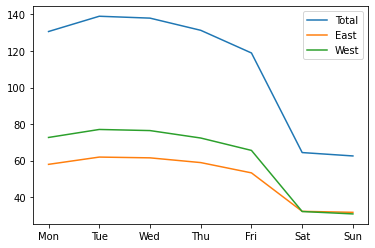

In [163]:
kaka.plot()

In [168]:
np.where(np.array([1,2,3,4,5]) < 3)

(array([0, 1], dtype=int64),)

### But, I also want to see the trend on weekends!! Then?

In [182]:
weekends = data[data.index.weekday > 5]

<AxesSubplot:xlabel='time'>

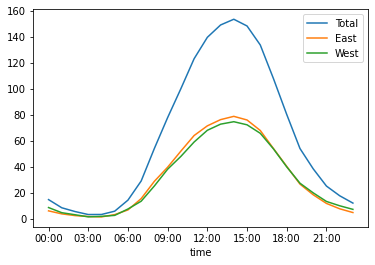

In [188]:
weekends.groupby(weekends.index.time).mean().plot(xticks= x_ticks_rounded)

#### This is what pretty much I would do if I am asked to show the chart of the bicycle rider on the weekends

    But the author of the book is one level up. He goes in this perticular direction. 
    See...

### The functionality is called `Double Group by` 
Let's refresh it a little bit.

In [193]:
_ = {'A': ['Aayush','Aayush','Heena','Sameer','Aayush','Mitesh','Mitesh','Baa','Baa'],
    'B':  ['Male','Female','Female','Male','Male','Male','Male','Female','Female'],
    'Age':[11,22,33,44,55,66,55,44,33]}

In [194]:
temp = pd.DataFrame(_)

In [196]:
temp

,A,B,Age
0,Aayush,Male,11
1,Aayush,Female,22
2,Heena,Female,33
3,Sameer,Male,44
4,Aayush,Male,55
5,Mitesh,Male,66
6,Mitesh,Male,55
7,Baa,Female,44
8,Baa,Female,33


In [198]:
temp.groupby(['A', 'B']).sum()

Age
A      B          
Aayush Female   22
       Male     66
Baa    Female   77
Heena  Female   33
Mitesh Male    121
Sameer Male     44

So as you can see that the `double groupby` is just `and` operation which checks for the compund unique value

## What author has done...

In [203]:
week_ends_and_days = np.where(data.index.weekday > 5, 'WeekEND','WeekDAY')

In [204]:
week_ends_and_days

array(['WeekDAY', 'WeekDAY', 'WeekDAY', ..., 'WeekDAY', 'WeekDAY',
       'WeekDAY'], dtype='<U7')

In [216]:
together_comparision = data.groupby([week_ends_and_days, data.index.time]).mean()
together_comparision

Total        East        West
WeekDAY 00:00:00   10.555062    4.490402    6.064660
        01:00:00    5.479087    2.453425    3.025662
        02:00:00    3.606991    1.765205    1.841786
        03:00:00    2.797737    1.426753    1.370984
        04:00:00    6.947666    3.725803    3.221863
        05:00:00   28.617701   17.464740   11.152960
        06:00:00  101.223075   60.948070   40.275005
        07:00:00  256.299050  159.033340   97.265710
        08:00:00  361.167307  212.673671  148.493635
        09:00:00  204.321609  110.857894   93.463715
        10:00:00   99.737619   51.938751   47.798868
        11:00:00   83.622600   43.123509   40.499090
        12:00:00   88.097635   44.376794   43.720841
        13:00:00   94.463730   46.521317   47.942413
        14:00:00  104.631568   48.906831   55.724737
        15:00:00  140.454123   60.440178   80.013945
        16:00:00  247.771827   85.612571  162.159256
        17:00:00  430.509297  121.318513  309.190784
        18:00:00  291.878133   96.781124  195.097009
        19:00:00  141.708771   52.889046   88.819725
        20:00:00   80.085893   32.079628   48.006265
        21:00:00   50.984842   22.088521   28.896322
        22:00:00   33.032943   14.184519   18.848424
        23:00:00   21.605699    8.851051   12.754648
WeekEND 00:00:00   14.781553    6.115291    8.666262
        01:00:00    8.495146    3.796117    4.699029
        02:00:00    5.594328    2.469790    3.124538
        03:00:00    3.294903    1.768204    1.526699
        04:00:00    3.338592    1.457524    1.881068
        05:00:00    5.871359    3.230583    2.640777
        06:00:00   14.370146    6.827670    7.542476
        07:00:00   29.112864   15.560680   13.552184
        08:00:00   54.224515   28.902913   25.321602
        09:00:00   77.922330   39.728155   38.194175
        10:00:00  100.152913   52.110437   48.042476
        11:00:00  123.211165   64.100728   59.110437
        12:00:00  139.682039   71.553398   68.128641
        13:00:00  149.191748   76.337379   72.854369
        14:00:00  153.603155   78.867718   74.735437
        15:00:00  148.416262   76.064320   72.351942
        16:00:00  133.794903   67.983010   65.811893
        17:00:00  107.805825   54.032767   53.773058
        18:00:00   80.291262   40.331311   39.959951
        19:00:00   54.106796   26.700243   27.406553
        20:00:00   38.476942   18.493932   19.983010
        21:00:00   25.206311   11.841019   13.365291
        22:00:00   17.748786    7.713592   10.035194
        23:00:00   12.100728    4.822816    7.277913

<AxesSubplot:>

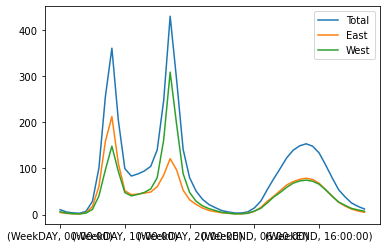

In [217]:
together_comparision.plot()

#### Shit?

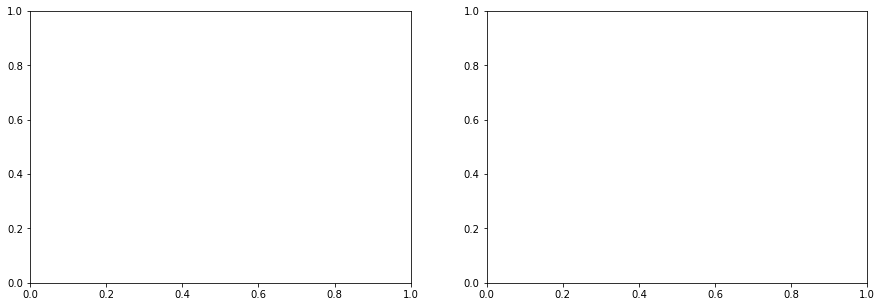

In [223]:
fig, ax = plt.subplots(1,2, figsize= (15,5))

In [231]:
together_comparision.loc['WeekDAY'].plot(ax= ax[0])
together_comparision.loc['WeekEND'].plot(ax= ax[1])


<AxesSubplot:xlabel='time'>

# That does not show!!!